# <span style="color:blue"> INDR 422/522 - LAB NO. 2</span>
## <span style="color:GREEN">TRANSFORMATIONS AND AUTO-CORRELATION FUNCTION</span>

### <span style="color:RED">MAIN TOPICS</span>
#### <span style="padding-left: 30px;color:GRAY">1. Transformations: differences</span>
#### <span style="padding-left: 30px;color:GRAY">2. Transformations: seasonal differences</span>
#### <span style="padding-left: 30px;color:GRAY">3. Naive forecast</span>
#### <span style="padding-left: 30px;color:GRAY">4. Exponential smoothing forecast</span>
#### <span style="padding-left: 30px;color:GRAY">5. Transformations: log transformations</span>
#### <span style="padding-left: 30px;color:GRAY">6. Auto-Correlation Function (AR-1)</span>
#### <span style="padding-left: 30px;color:GRAY">7. Auto-Correlation Function (AR-1)</span>
#### <span style="padding-left: 30px;color:GRAY">8. Auto-Correlation Function (MA-1)</span>
#### <span style="padding-left: 30px;color:GRAY">9. Auto-Correlation Function (Seasonal)</span>

### <span style="color:RED">INSTALLING REQUIRED TOOLS</span>

In [1]:
# First, you need to install the packages once on your PC. Open a new cell, add following codes (commented ones) -
# and run it, then import following tools:
# pip install matplotlib
# pip install bbplot
# pip install pandas
# pip install numpy

import matplotlib.pyplot as plt
import statsmodels.api as sm
from bbplot import bijan
import pandas as pd
import numpy as np

### <span style="color:RED">Error Formulas</span>

# <span style="color:GRAY">
$
\begin{aligned}
MAE  &= \frac{1}{n} \sum_{n} |Actual-Estimate| && \text{*** Mean Absolute Error}\\    
MAPE &= \frac{1}{n} \sum_{n} |\frac{Actual-Estimate}{Actual}| && \text{*** Mean Absolute Percentage Error}\\
MSE &= \frac{1}{n} \sum_{n} (Actual-Estimate)^2 && \text{*** Mean Squared Error}\\
RMSE &= \sqrt{MSE} && \text{*** Root Mean Square Error}\\
\end{aligned}
$</span>

### <span style="color:RED">Q1. TRANSFORMATIONS: DIFFERENCE</span>

In [2]:
# Import dataset: Haciosman_2022.csv to this notebook

data = pd.read_csv("Haciosman_2022.csv", header=None)
data.columns=['Day', 'No_of_Passengers']
data

,Day,No_of_Passengers
0,1,8007
1,2,6746
2,3,14434
3,4,14640
4,5,14541
...,...,...
310,311,19017
311,312,19600
312,313,19744
313,314,20045


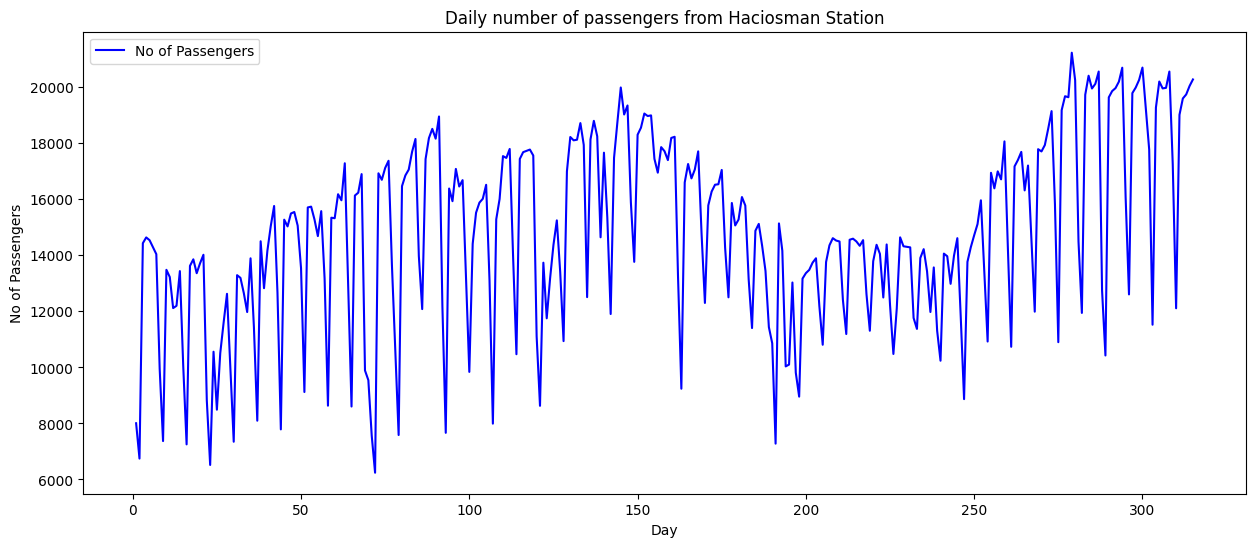

In [3]:
# Plot daily number of passengers from Haciosman Station

No_of_Passengers = data['No_of_Passengers']
Day = data['Day']
no_days = len(No_of_Passengers)

plt.figure(figsize = (15, 6))
plt.plot(Day,No_of_Passengers, 'b')
plt.xlabel("Day")
plt.ylabel("No of Passengers")
plt.title("Daily number of passengers from Haciosman Station")
plt.legend(['No of Passengers'])
plt.show()

In [4]:
# shift data one day to calculate difference transformation
data['y_n-1'] = No_of_Passengers.shift(+1)
diff_pass = No_of_Passengers[1:] - data['y_n-1'][1:]
diff_pass

1     -1261.0
2      7688.0
3       206.0
4       -99.0
5      -252.0
        ...  
310    6906.0
311     583.0
312     144.0
313     301.0
314     234.0
Length: 314, dtype: float64

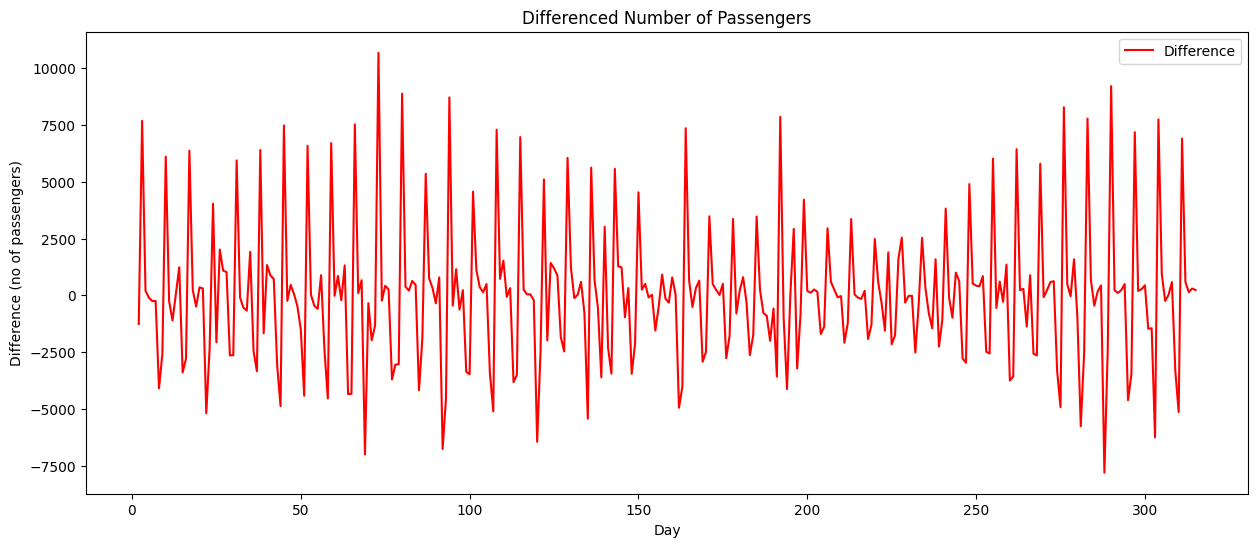

Mean of Differenced Number of Passengers:  39.0828025477707


In [5]:
# Plot differenced number of passengers

plt.figure(figsize = (15, 6))
plt.plot(Day[1:],diff_pass, 'r')
plt.xlabel("Day")
plt.ylabel("Difference (no of passengers)")
plt.title("Differenced Number of Passengers")
plt.legend(['Difference'])
plt.show()

mean_diff_pass = np.mean(diff_pass)
print('Mean of Differenced Number of Passengers: ', mean_diff_pass)

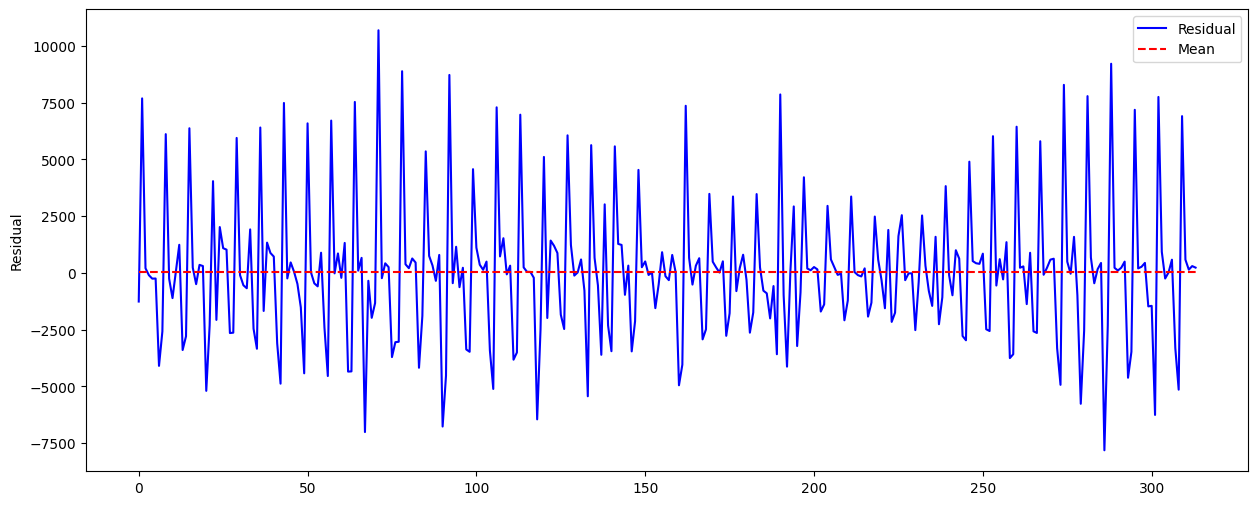

Mean of Residual:    39.0828025477707
S.D. of Residual:    3069.951664107905
Half Width :         340.8767272022013   (degree of freedom = 313, Confidence Level = 0.95)
p-value :            0.8217


In [6]:
# we do not have any forecast for this part, but we plot the following residual chart to check the statistical report. 

bijan.resid(diff_pass)

### <span style="color:RED">Q2. TRANSFORMATIONS: SEASONAL DIFFERENCE</span>

In [7]:
# shift data 7 days to calculate seasonal difference transformation
data['y_n-7'] = No_of_Passengers.shift(+7)
seasonal_diff_pass = No_of_Passengers[7:] - data['y_n-7'][7:]
seasonal_diff_pass

7      1942.0
8       625.0
9      -950.0
10    -1413.0
11    -2423.0
        ...  
310    -258.0
311    -605.0
312    -215.0
313      66.0
314    -282.0
Length: 308, dtype: float64

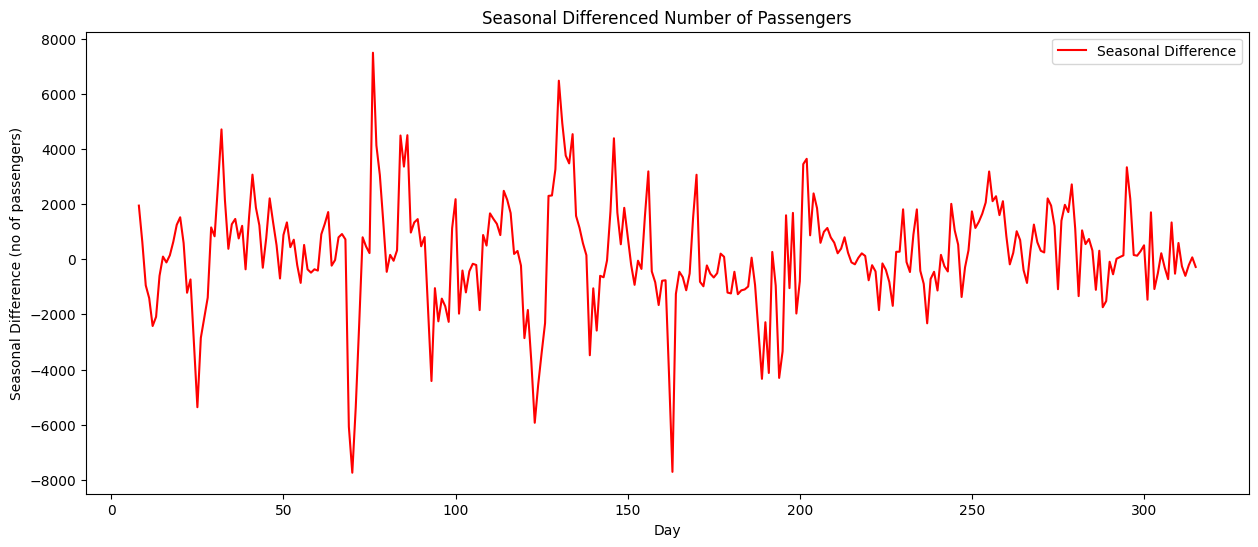

Mean of Seasonal Differenced Number of Passengers:  134.25


In [8]:
# Plot Seasonal Differenced number of passengers

plt.figure(figsize = (15, 6))
plt.plot(Day[7:],seasonal_diff_pass, 'r')
plt.xlabel("Day")
plt.ylabel("Seasonal Difference (no of passengers)")
plt.title("Seasonal Differenced Number of Passengers")
plt.legend(['Seasonal Difference'])
plt.show()

mean_seasonal_diff_pass = np.mean(seasonal_diff_pass)
print('Mean of Seasonal Differenced Number of Passengers: ', mean_seasonal_diff_pass)

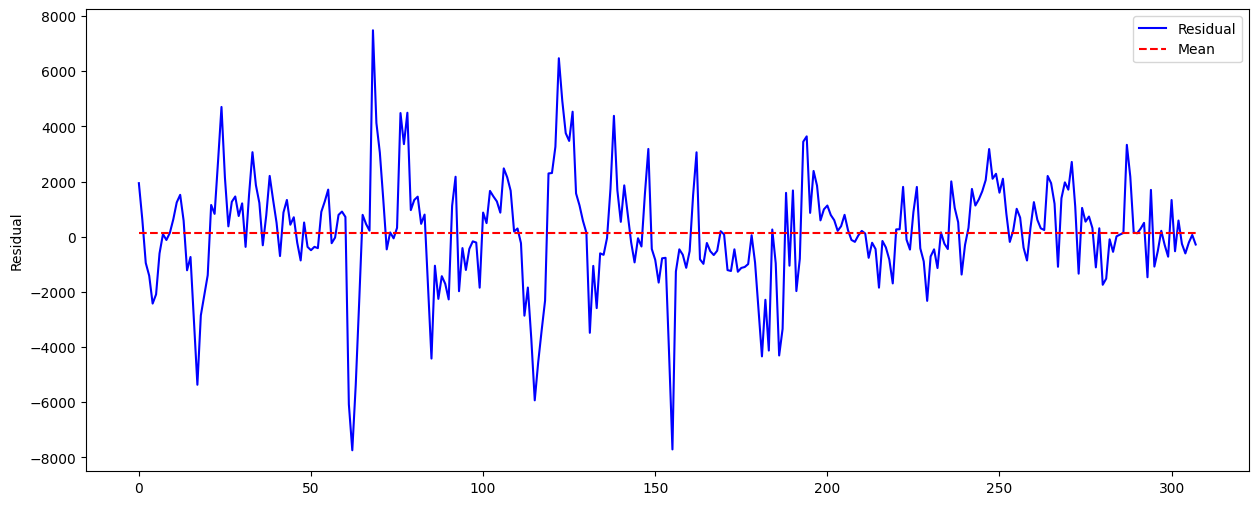

Mean of Residual:    134.25
S.D. of Residual:    1962.254310644187
Half Width :         220.0105555628606   (degree of freedom = 307, Confidence Level = 0.95)
p-value :            0.2308


In [9]:
# we do not have any forecast for this part, but we plot the following residual chart to check the statistical report. 

bijan.resid(seasonal_diff_pass)

### <span style="color:RED">Q3. NAIVE FORECAST</span>
#### $\hat{y}[n] = {y}[n-1]$

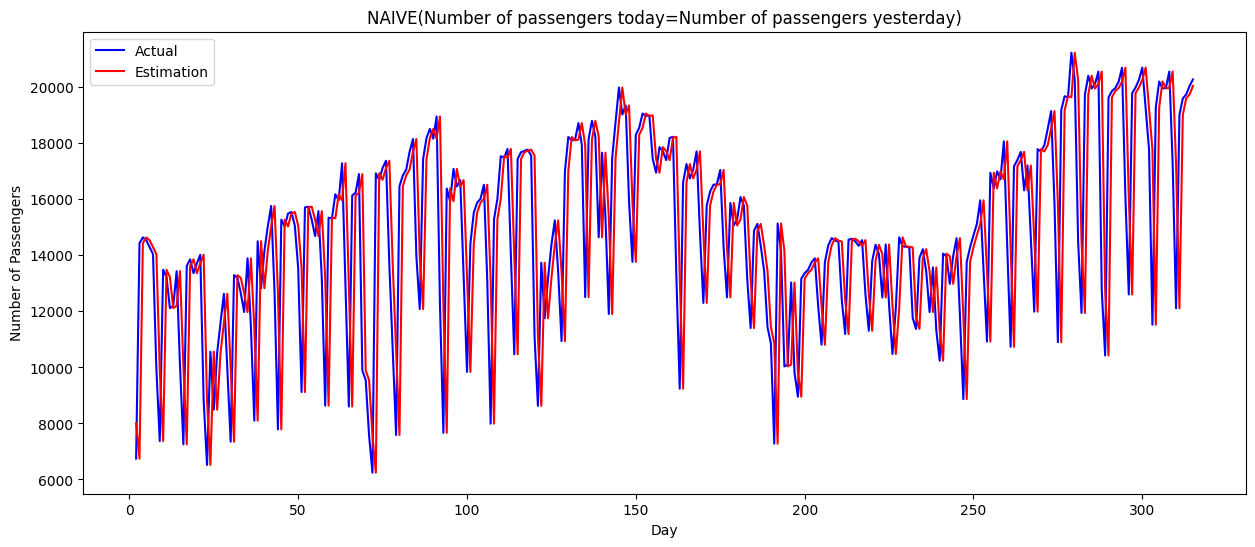

MAE1  =  2091.68
MAPE1 =  15.91%
MSE1  =  9396116.03
RMSE1 =  3065.31


In [10]:
# Define Actual and Estimated number of passengers for estimation range >>> month[1:]

Actual_pass = No_of_Passengers[1:]
Estimate_pass = data['y_n-1'][1:]
Day_r = Day[1:]


# Error calculation

Error1 = Actual_pass - Estimate_pass
mae1=np.mean(np.abs(Error1))
mape1=np.mean(np.abs(Error1)/Actual_pass)*100
mse1=np.mean(Error1**2)
rmse1=np.sqrt(mse1)


# Plot Daily Number of Passengers

plt.figure(figsize = (15, 6))
plt.plot(Day_r,Actual_pass, 'b')
plt.plot(Day_r,Estimate_pass, 'r')

plt.xlabel("Day")
plt.ylabel("Number of Passengers")
plt.title("NAIVE(Number of passengers today=Number of passengers yesterday)")
plt.legend(['Actual','Estimation'])
plt.show()

print('MAE1  = ', "%.2f" % mae1)
print('MAPE1 = ', "{0:.2f}%".format(mape1))
print('MSE1  = ', "%.2f" % mse1)
print('RMSE1 = ', "%.2f" % rmse1)

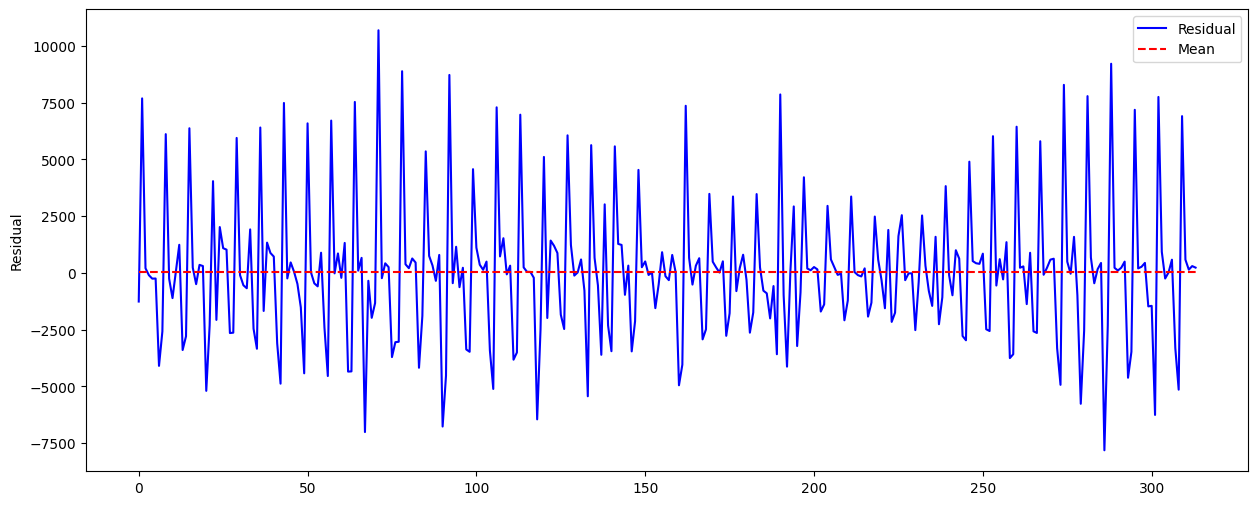

Mean of Residual:    39.0828025477707
S.D. of Residual:    3069.951664107905
Half Width :         340.8767272022013   (degree of freedom = 313, Confidence Level = 0.95)
p-value :            0.8217


In [11]:
# Residual plot of naive forecast

bijan.resid(Error1)

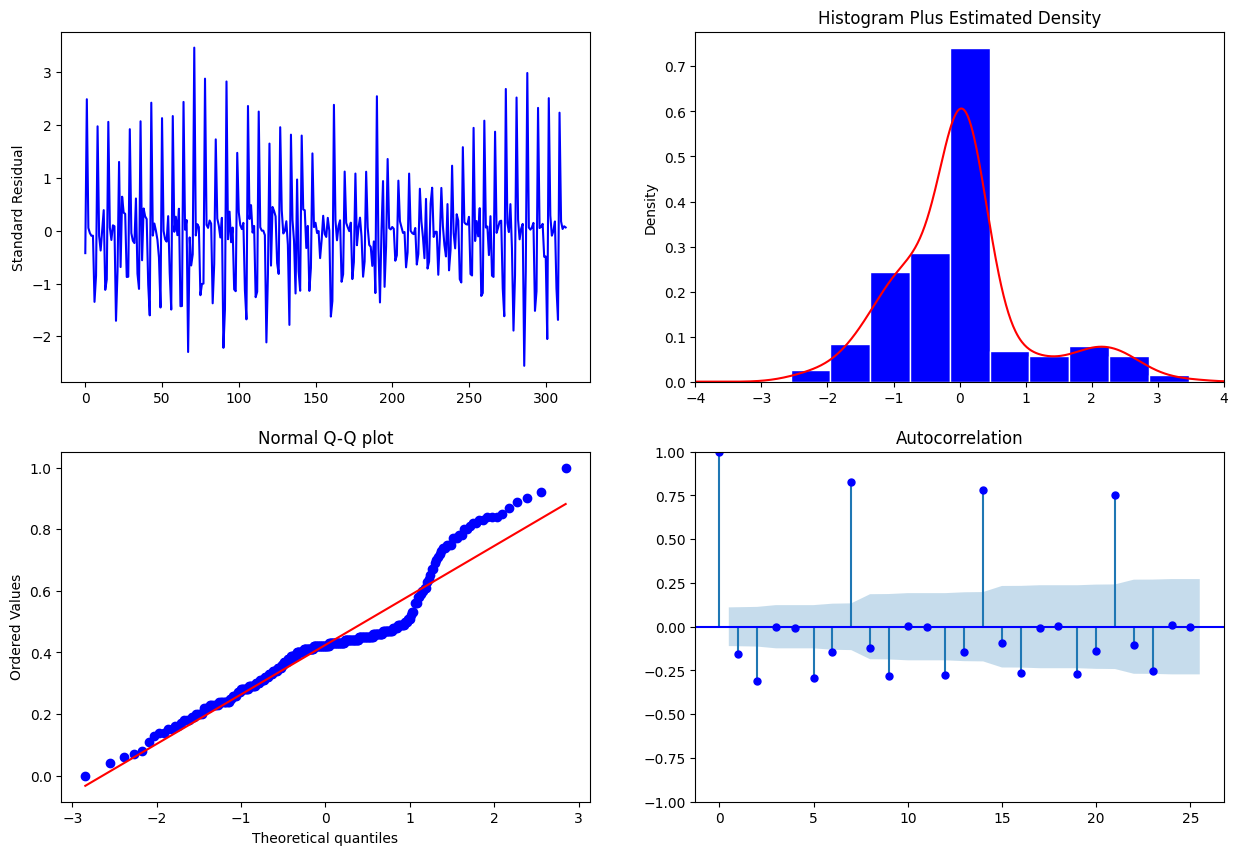

In [12]:
# Plot diagnostic error of naive forecast

bijan.eplot(Error1)

### <span style="color:RED">Q4. EXPONENTIAL SMOOTHING</span>
#### $\hat{y}[n] = {\alpha*y[n-1]+(1-\alpha)*\hat{y}[n-1]}$

In [13]:
# define a range for alpha (0, 0.10, 0.20, .... 0.90) and then run simulator for exponential smoothing anf recording errors
alpha_set = [i/100 for i in range(0,100, 10)]
no = 0
report_q4 = {}

for iter in range(0,100, 10):
    
    alpha = alpha_set[no]
    # define required variables for calculations
    t = range(0, len(No_of_Passengers))
    y_t = No_of_Passengers
    z_t = [0] * (len(No_of_Passengers))
    u_t = [0] * (len(No_of_Passengers))
    u_hat = [0] * (len(No_of_Passengers))
    y_hat = [0] * (len(No_of_Passengers))

    # calculat z_t, u_t, u_hat, y_hat
    for i in range(1, len(No_of_Passengers)):
        z_t[i] = y_t[i] - y_t[i-1]

    for j in range(8, len(No_of_Passengers)):
        u_t[j] = z_t[j] - z_t[j-7]

    u_hat[8] = u_t[8]
    for k in range(9, len(No_of_Passengers)):
        u_hat[k] = alpha*u_t[k-1]+(1-alpha)*u_hat[k-1]

    for m in range(8, len(No_of_Passengers)):
        y_hat[m] = u_hat[m] + z_t[m-7] + y_t[m-1]

    # Error Calculations
    Error_q4 = [0]*(len(No_of_Passengers)-8)

    for n in range(8, len(No_of_Passengers)):
        Error_q4[n-8] = y_t[n]-y_hat[n]

    mae_q4=np.mean(np.abs(Error_q4))
    mape_q4=np.mean(np.abs(Error_q4)/y_t[8:])*100
    mse_q4=np.mean(np.square(Error_q4))
    rmse_q4=np.sqrt(mse_q4)
    
    report_q4[alpha] = [mae_q4, mape_q4, mse_q4, rmse_q4]
    
    no = no + 1


pd.options.display.float_format = '{:,.2f}'.format
report = pd.DataFrame(report_q4, index=['MAE_q4', 'MAPE_q4', 'MSE_q4', 'RMSE_q4'])

report

,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
MAE_q4,"1,683.91","1,285.35","1,325.93","1,374.78","1,430.03","1,486.65","1,546.23","1,608.44","1,676.12","1,755.96"
MAPE_q4,12.03,9.55,9.83,10.17,10.55,10.94,11.34,11.76,12.24,12.80
MSE_q4,"4,519,324.42","3,091,769.01","3,332,853.42","3,589,920.62","3,871,006.99","4,185,048.41","4,538,705.93","4,938,665.84","5,394,219.82","5,919,324.22"
RMSE_q4,"2,125.87","1,758.34","1,825.61","1,894.71","1,967.49","2,045.74","2,130.42","2,222.31","2,322.55","2,432.97"


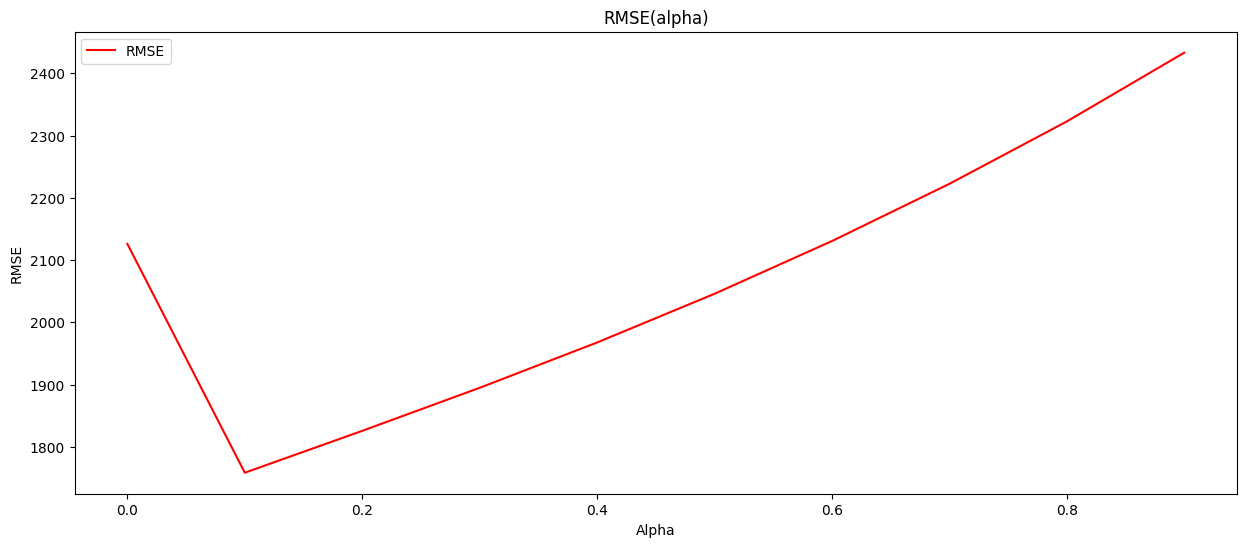

In [14]:
# Plot RMSE vs. Alpha: as you can see minimum RMSE occurs when aplpha is 0.1

rmse = []
for i in alpha_set:
    rmse.append(report_q4[i][3])
    
plt.figure(figsize = (15, 6))
plt.plot(alpha_set,rmse, 'r')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE(alpha)")
plt.legend(['RMSE'])
plt.show()

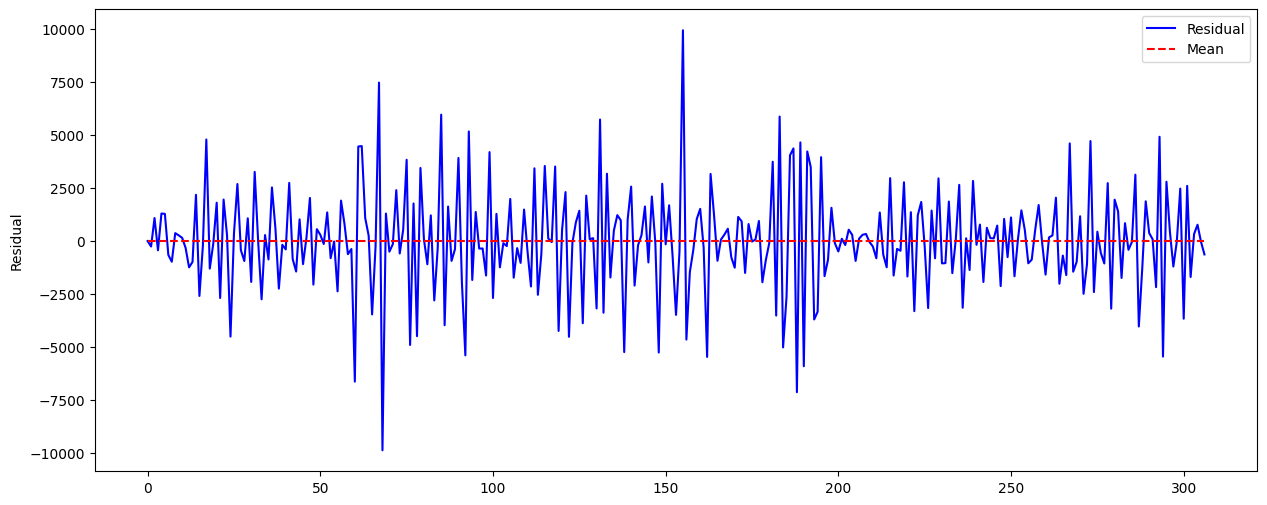

Mean of Residual:    3.7358674471420374
S.D. of Residual:    2436.9354548084816
Half Width :         273.6806167110427   (degree of freedom = 306, Confidence Level = 0.95)
p-value :            0.9786


In [15]:
# Residual Plot (Actual observation - Estimation) when alpha is 0.9

bijan.resid(Error_q4)

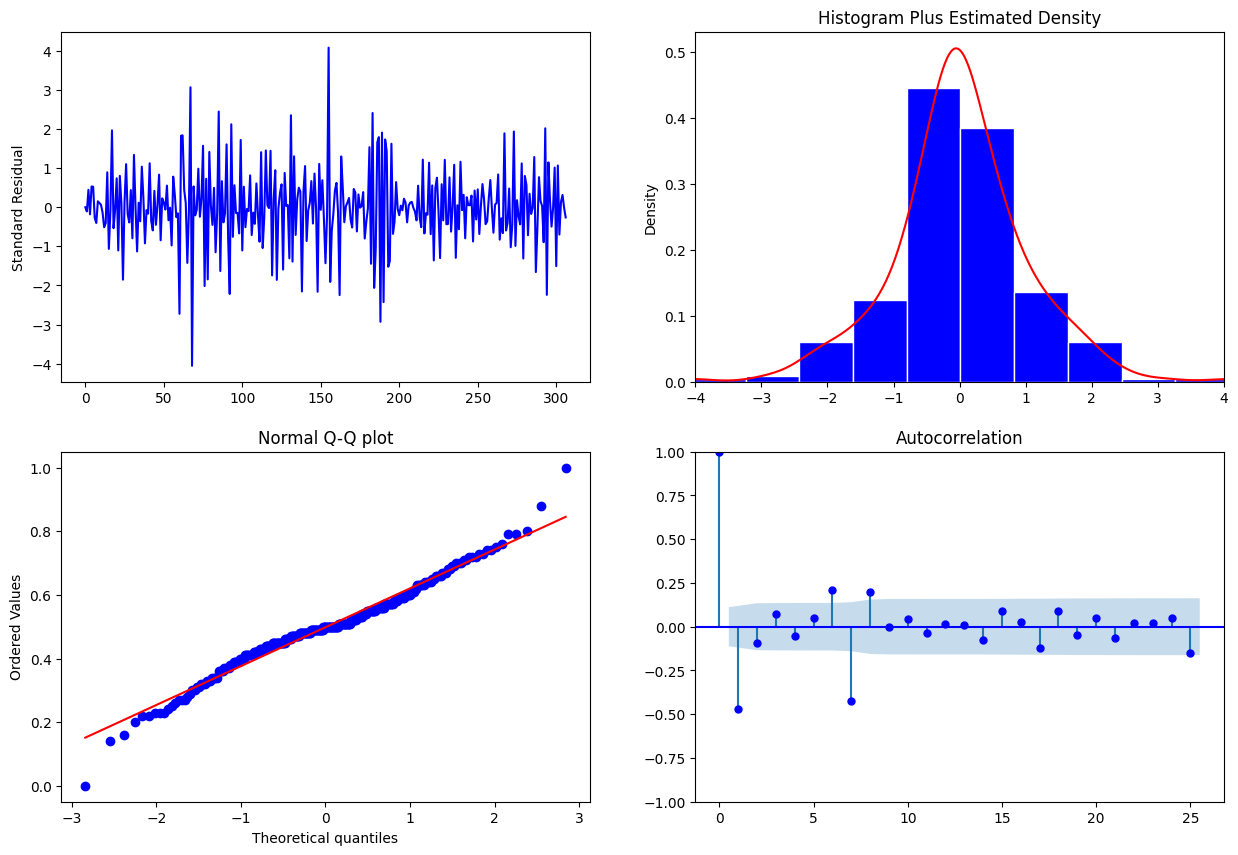

In [16]:
# Diagnostic errors for residusal (Actual - Estimation) when alpha is 0.9

bijan.eplot(Error_q4)

### <span style="color:RED">Q5. TRANSFORMATIONS: LOG</span>

In [17]:
# Import dataset: covid_italy.csv to this notebook

data = pd.read_csv("covid_italy.csv", header=None)
data.columns=['Day', 'New_Cases']
data

,Day,New_Cases
0,1,2473
1,2,2895
2,3,3118
3,4,3126
4,5,2070
...,...,...
205,206,93192
206,207,78943
207,208,41602
208,209,102429


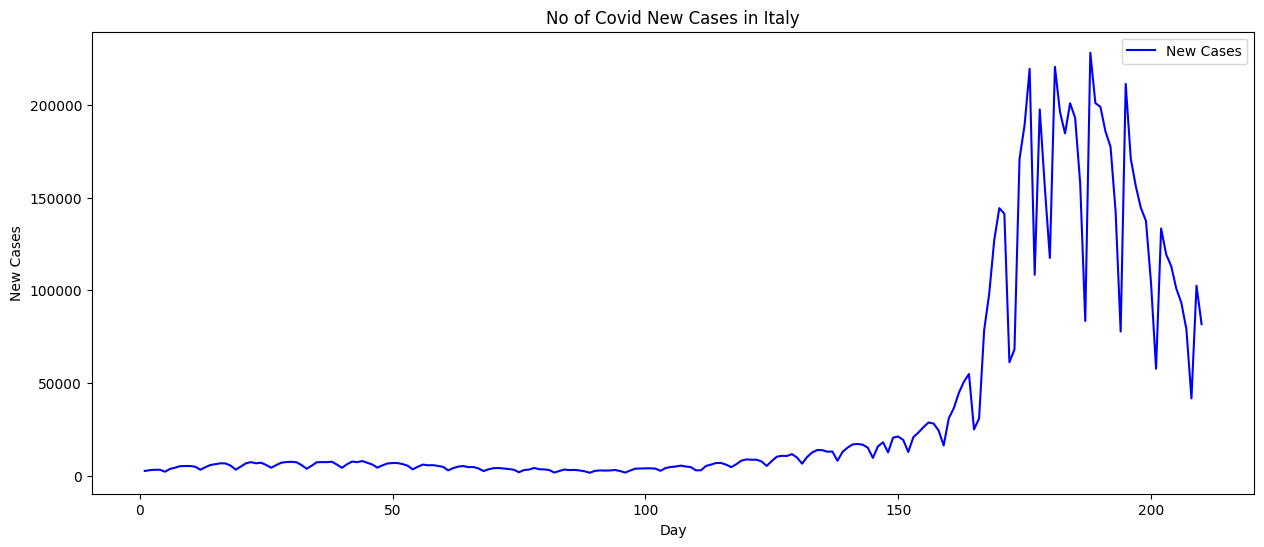

In [18]:
# Plot daily Number of Covid New Cases in Italy

New_Case = data['New_Cases']
Day = data['Day']
no_days = len(New_Case)

plt.figure(figsize = (15, 6))
plt.plot(Day,New_Case, 'b')
plt.xlabel("Day")
plt.ylabel("New Cases")
plt.title("No of Covid New Cases in Italy")
plt.legend(['New Cases'])
plt.show()

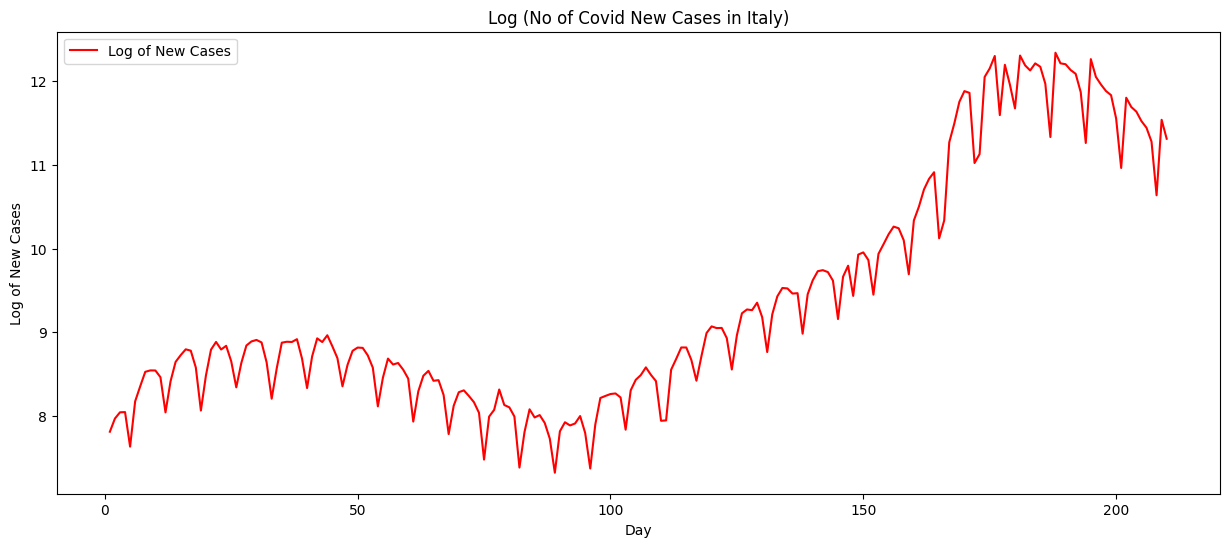

In [19]:
# perform a log transformation and plot it

New_Case_log = np.log(New_Case)

plt.figure(figsize = (15, 6))
plt.plot(Day,New_Case_log, 'r')
plt.xlabel("Day")
plt.ylabel("Log of New Cases")
plt.title("Log (No of Covid New Cases in Italy)")
plt.legend(['Log of New Cases'])
plt.show()

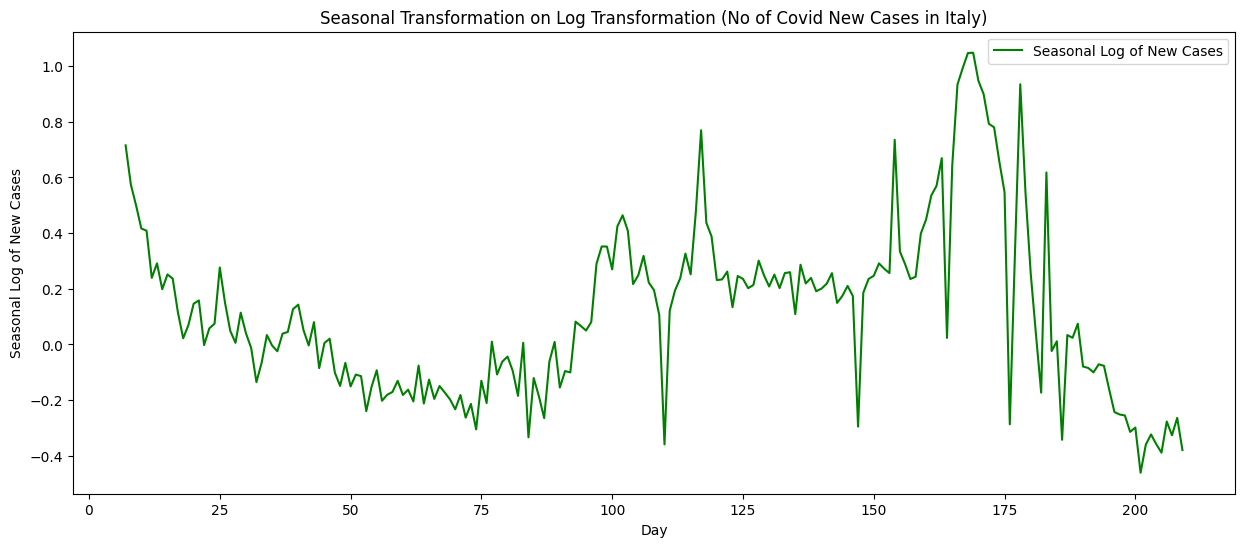

In [20]:
# Plot Seasonal Differenced after applying a log transformation

New_Case_log_diff = [0]*(no_days-7)
for i in range(7, no_days):
    New_Case_log_diff[i-7] = New_Case_log[i] - New_Case_log[i-7]
    
plt.figure(figsize = (15, 6))
plt.plot(range(7, no_days),New_Case_log_diff, 'g')
plt.xlabel("Day")
plt.ylabel("Seasonal Log of New Cases")
plt.title("Seasonal Transformation on Log Transformation (No of Covid New Cases in Italy)")
plt.legend(['Seasonal Log of New Cases'])
plt.show()

### <span style="color:RED">Q6. AUTO CORRELATION FUNCTION</span>

In [21]:
# Generate an AR (1) process 
c = 200
sigma = 20
phi1 = 0.9

# we generate the normally distributed vector of error terms
np.random.seed(123)
eps = np.random.normal(0, sigma, 501)

y_ar=[0]*501
y_ar[0]=c

# auto-regression on the previous observation
for i in range(1,501):
    y_ar[i] = c + phi1 * y_ar[i-1]  + eps[i] 

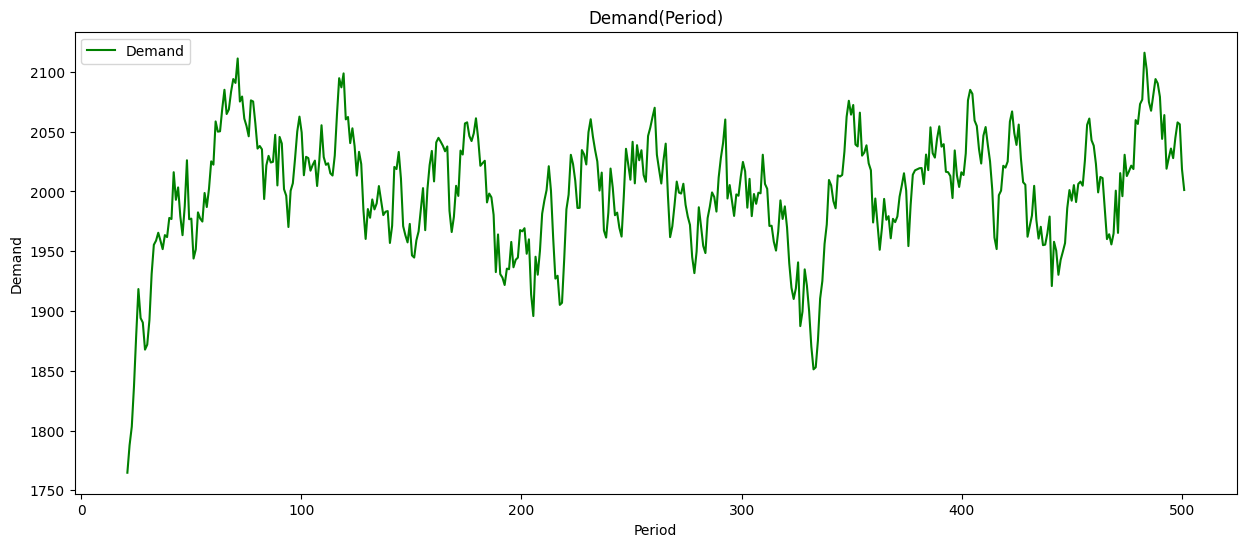

In [22]:
time_axis = np.linspace(0,501,501)
start = 21 # indicates the starting time

plt.figure(figsize = (15, 6))
plt.plot(time_axis[start:],y_ar[start:], 'g')
plt.xlabel("Period")
plt.ylabel("Demand")
plt.title("Demand(Period)")
plt.legend(['Demand'])
plt.show()

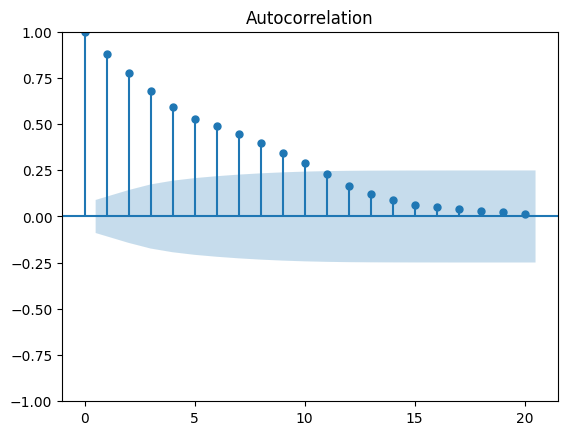

In [23]:
# The auto-correlation function plot
# take the data from period 21, apparently lines decresaing exponentially since phi1 > 0
sm.graphics.tsa.plot_acf(y_ar[start:], lags=20);

### <span style="color:RED">Q7. AUTO CORRELATION FUNCTION</span>

In [24]:
# Generate an AR (1) process 
c = 200
sigma = 20
phi1 = - 0.9

# we generate the normally distributed vector of error terms
eps = np.random.normal(0, sigma, 501)

y_ar=[0]*501
y_ar[0]=c

# auto-regression on the previous observation
for i in range(1,501):
    y_ar[i] = c + phi1 * y_ar[i-1]  + eps[i] 

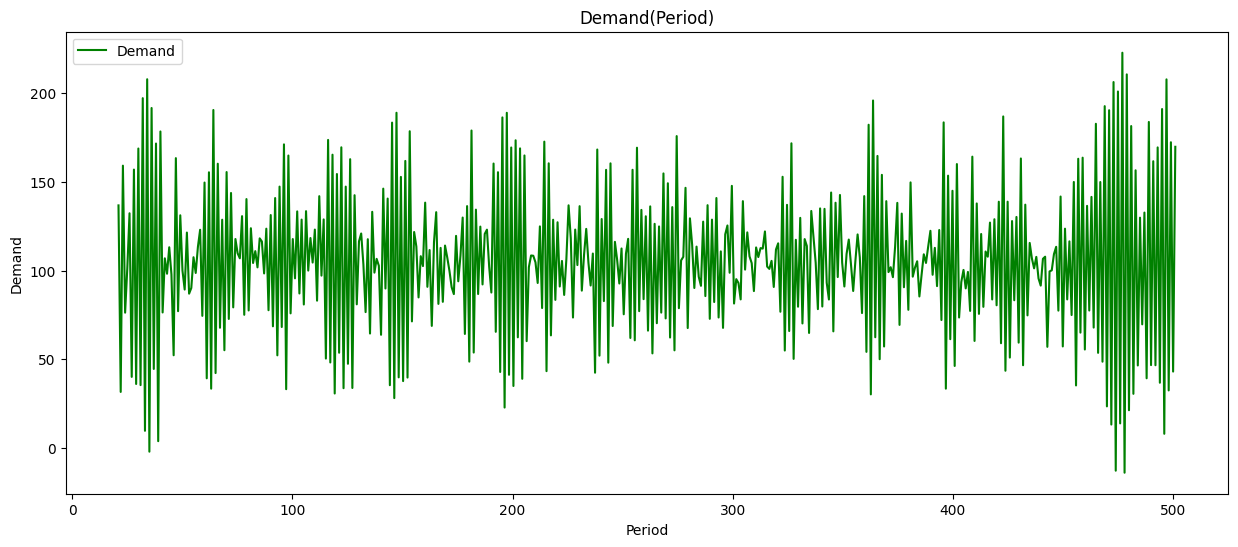

In [25]:
time_axis = np.linspace(0,501,501)
start = 21 # indicates the starting time

plt.figure(figsize = (15, 6))
plt.plot(time_axis[start:],y_ar[start:], 'g')
plt.xlabel("Period")
plt.ylabel("Demand")
plt.title("Demand(Period)")
plt.legend(['Demand'])
plt.show()

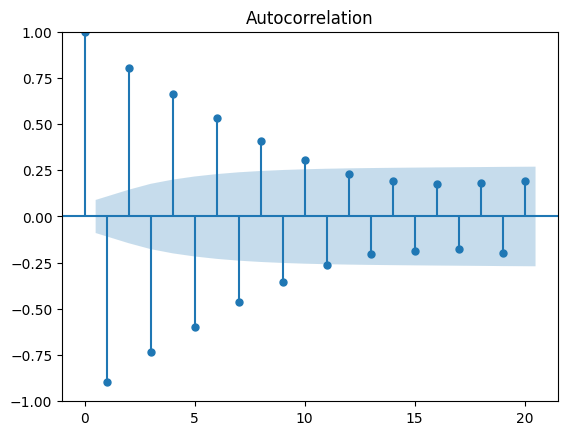

In [26]:
# The auto-correlation function plot
# take the data from period 21, apparently lines decresaing exponentially zigzag since phi1 < 0
# first line gets negative value, second gets postive value and ....
sm.graphics.tsa.plot_acf(y_ar[start:], lags=20);

### <span style="color:RED">Q8. AUTO CORRELATION FUNCTION</span>

In [27]:
# Generate an MA (1) process 
c = 200
sigma = 20
theta1 = 0.9

# we generate the normally distributed vector of error terms
eps = np.random.normal(0, sigma, 501)
y_ma=[0]*501

# initialize
y_ma[0]=c

# auto-regression on the previous error
for i in range(1,501):
     y_ma[i] = c + theta1*eps[i-1]  + eps[i]

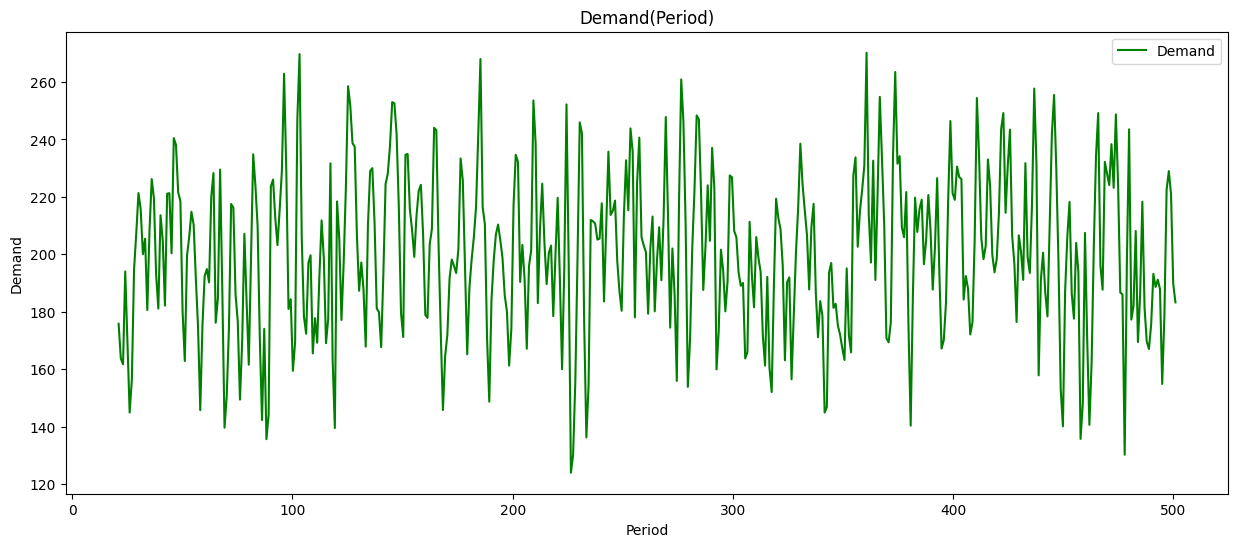

In [28]:
time_axis = np.linspace(0,501,501)
start = 21 # indicates the starting time

plt.figure(figsize = (15, 6))
plt.plot(time_axis[start:],y_ma[start:], 'g')
plt.xlabel("Period")
plt.ylabel("Demand")
plt.title("Demand(Period)")
plt.legend(['Demand'])
plt.show()

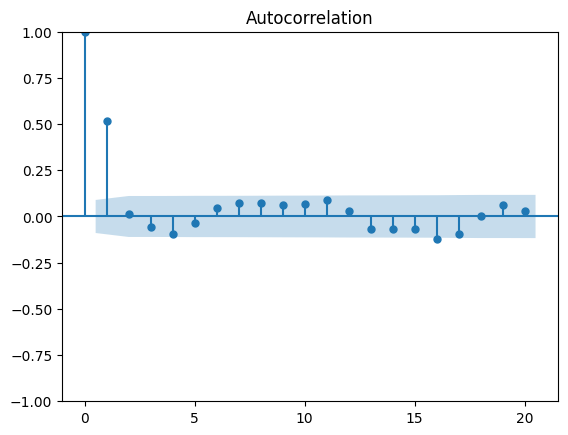

In [29]:
# The auto-correlation function plot
# take the data from period 21, we can see a spike in the first line 
sm.graphics.tsa.plot_acf(y_ma[start:], lags=20);

### <span style="color:RED">Q9. Australian Beer Production </span>

In [30]:
# Import dataset: ausbeer.csv to this notebook

data = pd.read_csv("ausbeer.csv", header=None)
data.columns=['Month', 'Production']
data.head()

,Month,Production
0,1,164
1,2,148
2,3,152
3,4,144
4,5,155


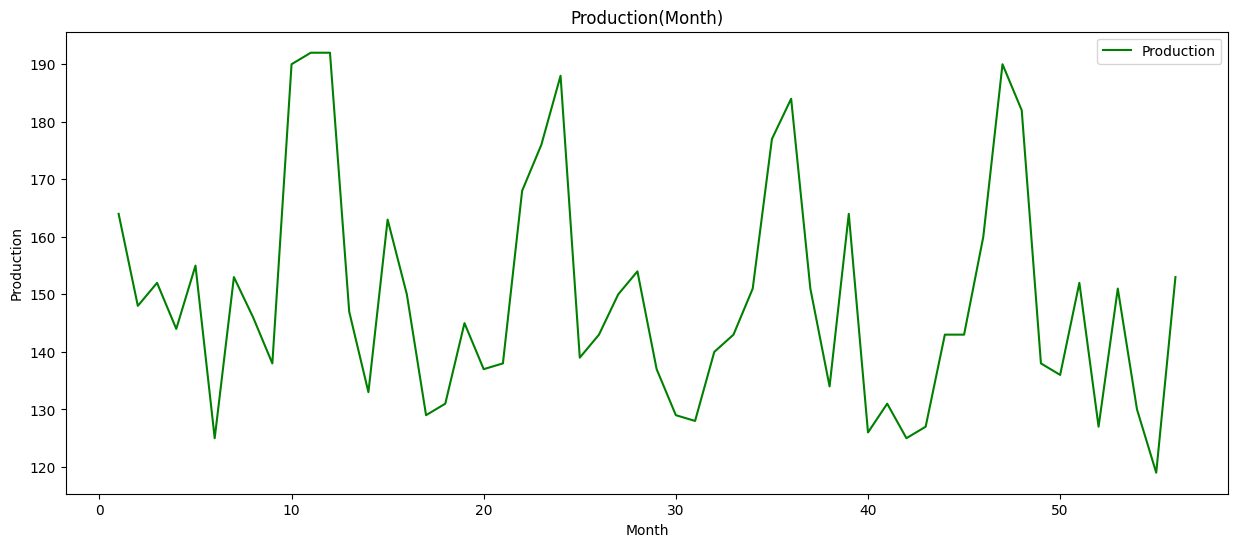

In [31]:
# Plot Monthly Australian Beer Production

production = data['Production']
month = data['Month']

plt.figure(figsize = (15, 6))
plt.plot(month,production, 'g')
plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Production(Month)")
plt.legend(['Production'])
plt.show()

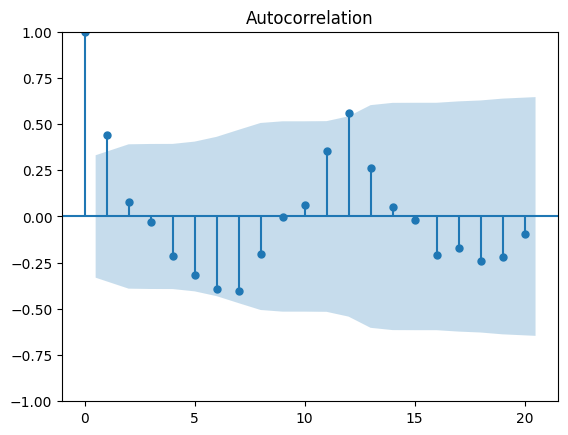

In [32]:
# The auto-correlation function plot
# take the data from period 21, we can see a sin pattern in ACF that shows seasonality in dataset

sm.graphics.tsa.plot_acf(production[start:], lags=20);

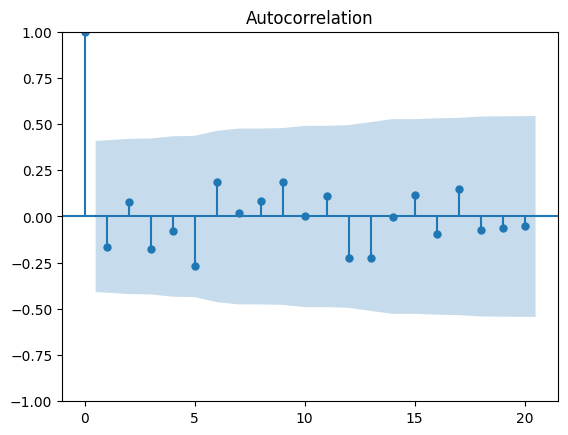

In [33]:
# Deasonalized dataset (difference between current month production from its 12 month ago production)  

data['y_n-12'] = production.shift(+12)
seasonal_diff_prod = production[12:] - data['y_n-12'][12:]

# The auto-correlation function plot
# take the data from period 21

sm.graphics.tsa.plot_acf(seasonal_diff_prod[start:], lags=20);

# as you can see the sin pattern removed on deasonalized dataset, the blue region is wide due to limited number of observations

In [34]:
# Implement an exponentially smoothed seasonal difference based forecast 
# We assume that alpha is 0.70

alpha = 0.7

y_hat = [0]*len(month)

y_t = production
y_hat[0:13] = production[0:13]

for i in range(12, len(month)):
    y_hat[i] = alpha * y_t[i-12] + (1-alpha) * y_hat[i-12]
    
Error_q9 = [0]*(len(month)-12)

for n in range(12, len(month)):
    Error_q9[n-12] = y_t[n]-y_hat[n]

mae_q9=np.mean(np.abs(Error_q9))
mape_q9=np.mean(np.abs(Error_q9)/y_t[12:])*100
mse_q9=np.mean(np.square(Error_q9))
rmse_q9=np.sqrt(mse_q9)


print('MAE_q9  = ', "%.2f" % mae_q9)
print('MAPE_q9 = ', "{0:.2f}%".format(mape_q9))
print('MSE_q9  = ', "%.2f" % mse_q9)
print('RMSE_q9 = ', "%.2f" % rmse_q9)


MAE_q9  =  8.92
MAPE_q9 =  6.17%
MSE_q9  =  127.58
RMSE_q9 =  11.29


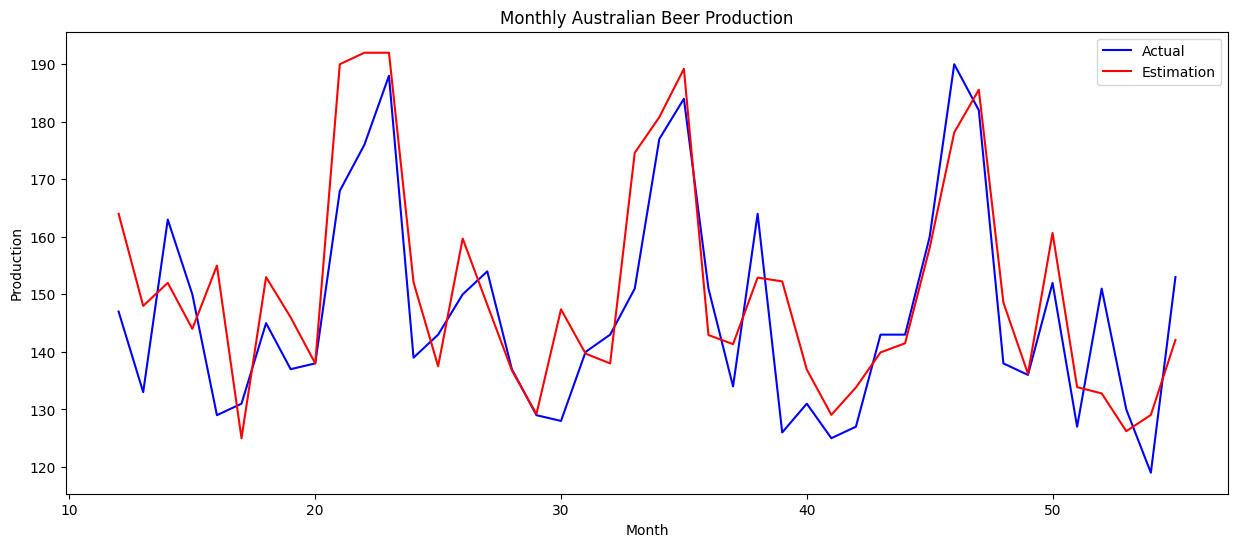

In [35]:
# plot actual vs. estimated production level

plt.figure(figsize = (15, 6))
plt.plot(range(12, len(month)),y_t[12:], 'b')
plt.plot(range(12, len(month)),y_hat[12:], 'r')

plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Monthly Australian Beer Production")
plt.legend(['Actual','Estimation'])
plt.show()

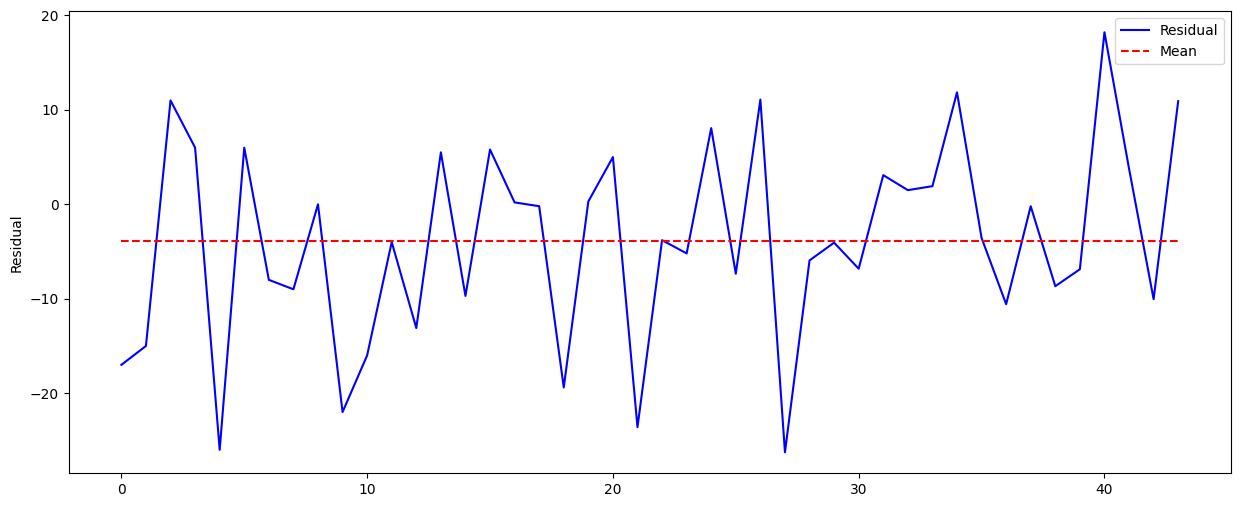

Mean of Residual:    -3.911681818181816
S.D. of Residual:    10.718524247112605
Half Width :         3.25872921241208   (degree of freedom = 43, Confidence Level = 0.95)
p-value :            0.0198


In [36]:
# plot residual of above estimation

bijan.resid(Error_q9)

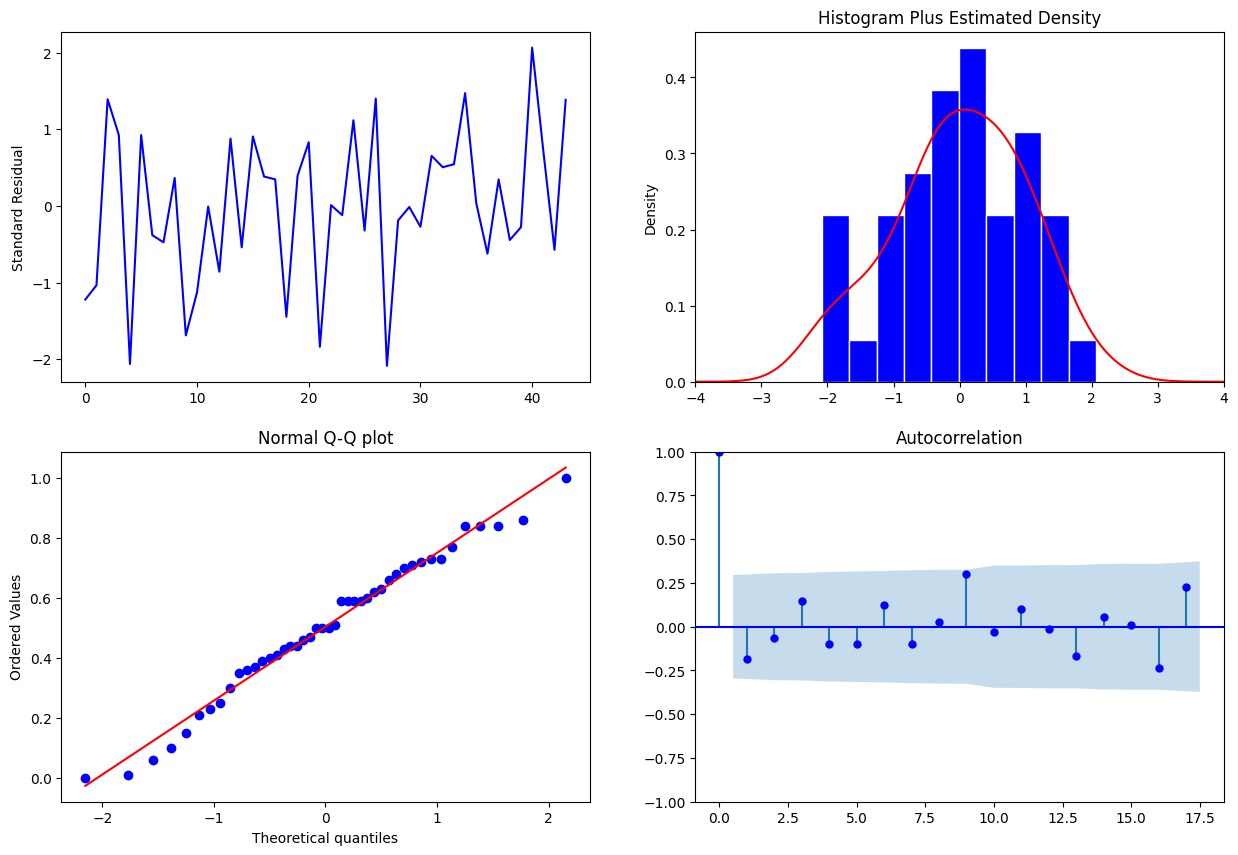

In [37]:
# Diagnostic errors for residusal (Actual - Estimation) when alpha is 0.70

bijan.eplot(Error_q9)